In [7]:
## 1. mpg 데이터셋을 판다스로 읽어온다.  

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # 축의 음수 기호 표시

mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
## 경고 메시지 표시 안함
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 기본 정보 확인

In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
# 3. 결측치 확인

In [5]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [4]:
# 4. 결측치 처리(평균값으로 대체 )

In [6]:
mpg['horsepower'].fillna(mpg['horsepower'].mean(),inplace=True)

ChatGPT
mpg['horsepower'].fillna(mpg['horsepower'].mean(), inplace=True)와 
mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean(), inplace=True)는 
동일한 결과를 얻게 되지만, 두 가지 표현 방식 간에는 차이가 있습니다.

mpg['horsepower'].fillna(mpg['horsepower'].mean(), inplace=True):

inplace=True를 사용하면 메서드가 반환하는 값이 없습니다. 
즉, 새로운 할당이 필요하지 않습니다. 
대신, 해당 메서드가 직접 원본 데이터프레임을 수정합니다.

예를 들어, 다른 변수에 할당하지 않아도 됩니다. 

예시 코드에서는 mpg['horsepower'] 열의 결측값을 해당 열의 평균값으로 채우는 작업이 mpg 데이터프레임에 직접 적용됩니다.

mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean(), inplace=True):

inplace=True를 사용하더라도, 이 경우에는 메서드가 반환하는 값이 여전히 새롭게 할당된 열의 Series입니다. 그리고 이 Series가 다시 mpg['horsepower'] 열로 할당됩니다.

이 방식은 반환된 Series를 새로운 변수에 할당하려는 의도를 나타냅니다. 
그러나 inplace=True를 사용하면 반환 값이 None이므로, 
새로운 할당이 필요하지 않습니다. 따라서 보통은 아래와 같이 사용합니다:

pythonCopy code
mpg['horsepower'].fillna(mpg['horsepower'].mean(), inplace=True)

이렇게 하면 코드가 더 간결해지며, 메서드가 반환하는 값이 필요하지 않을 때 효율적으로 사용됩니다.

간단히 말해서, inplace=True를 사용하면 반환 값이 없어서 할당이 필요하지 않습니다. 
두 코드 모두 동일한 결과를 얻을 수 있지만, 보통은 inplace=True를 사용하여 직접 데이터프레임을 수정하는 방식이 더 권장됩니다.

In [7]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


ChatGPT 
fillna 메서드를 사용할 때 inplace=True를 설정하면, 
메서드가 반환하는 것이 None이 되어 해당 작업이 원본 데이터프레임에 바로 적용됩니다. 
따라서 새로운 할당이 필요하지 않습니다.


In [8]:
mpg['origin_encoded'] = mpg['origin'].map({'usa':0,'europe':1,'japan':2})
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_encoded
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,1
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0


In [5]:
#5. 범주형 데이터 (origin)를 숫자로 변환 ('usa':0, 'europe':1, 'Japan':2)

In [9]:
# 범주형 데이터를 숫자로 매핑
origin_mapping = {'usa': 0, 'europe': 1, 'Japan': 2}
mpg['origin_numeric'] = mpg['origin'].map(origin_mapping)

# 결과 출력
print(mpg[['origin','origin_numeric']])

     origin  origin_numeric
0       usa             0.0
1       usa             0.0
2       usa             0.0
3       usa             0.0
4       usa             0.0
..      ...             ...
393     usa             0.0
394  europe             1.0
395     usa             0.0
396     usa             0.0
397     usa             0.0

[398 rows x 2 columns]


In [10]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_encoded,origin_numeric
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,1,1.0
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,0,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0,0.0


#6. 6. ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_encoded'] 
항목만 선택하여 변수에 저장

In [14]:
subset = mpg[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_encoded']]

In [10]:
# 7. 데이터 표준화

In [22]:
from sklearn.preprocessing import StandardScaler

# StandardScaler를 사용하여 데이터 표준화
scaler = StandardScaler()
subset_st = scaler.fit_transform(subset.drop(['mpg'], axis=1))

subset_st

# 표준화된 데이터를 판다스 데이터프레임으로 변환
subset_st_df = pd.DataFrame(subset_st, columns=subset.columns[1:])

In [72]:
# 8. 상관분석

In [23]:
corr_matrix=subset_st_df.corr()
corr_matrix

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encoded
cylinders,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model_year,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin_encoded,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


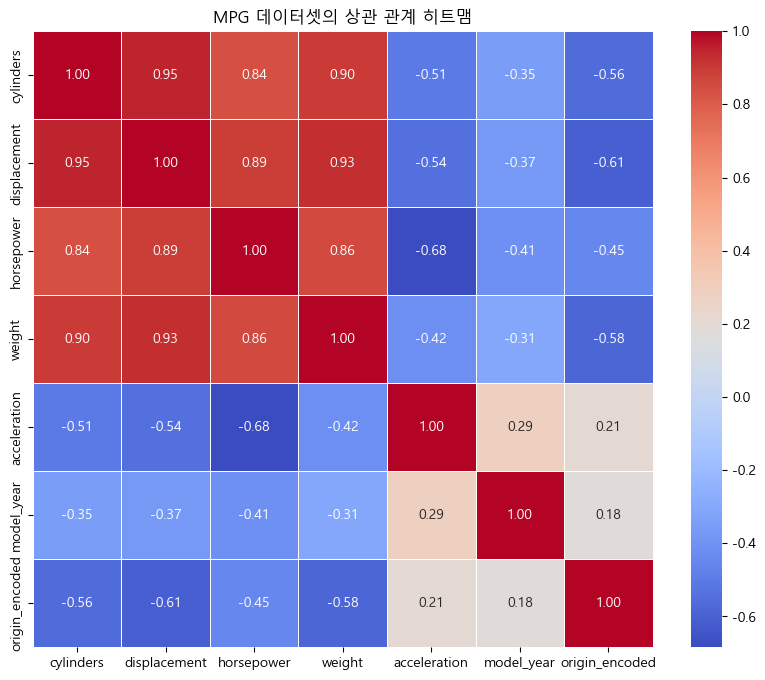

In [24]:
#9. 히트맴 그리기

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('MPG 데이터셋의 상관 관계 히트맴')
plt.show()